In [1]:
from sae import Cache
import json
import torch
import numpy as np
import matplotlib.pyplot as plt

/Users/plato/code/mteb/v/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
c = Cache()

In [3]:
activations = []
for _, d in c.all_data():
    activations.append(d)

In [4]:
t = torch.tensor(np.array(activations))

In [27]:
i = torch.topk(torch.mean(t, dim=0), 1024*4).indices

In [28]:
t[:,i].shape

torch.Size([4902, 4096])

In [29]:
torch.save(i, 'indices.pt')

(array([1670.,  990.,  763.,  621.,  578.,  498.,  461.,  410.,  398.,
         370.,  382.,  326.,  341.,  304.,  292.,  288.,  259.,  246.,
         285.,  244.,  227.,  207.,  233.,  213.,  180.,  215.,  181.,
         170.,  179.,  187.,  181.,  166.,  175.,  142.,  139.,  134.,
         133.,  132.,  136.,  124.,  124.,  130.,  100.,  107.,  110.,
         114.,  109.,  117.,  103.,  108.,  101.,  102.,   99.,   84.,
          77.,   96.,   76.,   67.,   75.,   72.,   83.,   89.,   79.,
          78.,   68.,   71.,   79.,   72.,   68.,   65.,   67.,   71.,
          63.,   66.,   78.,   71.,   60.,   76.,   63.,   68.,   54.,
          57.,   47.,   45.,   54.,   65.,   48.,   56.,   57.,   50.,
          69.,   52.,   55.,   43.,   50.,   49.,   46.,   31.,   42.,
          97.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.

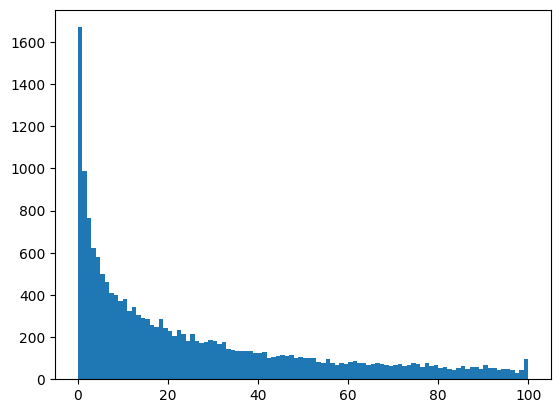

In [19]:
plt.hist(torch.sum(t > 0, dim=0), bins=100, range=(0, 100))

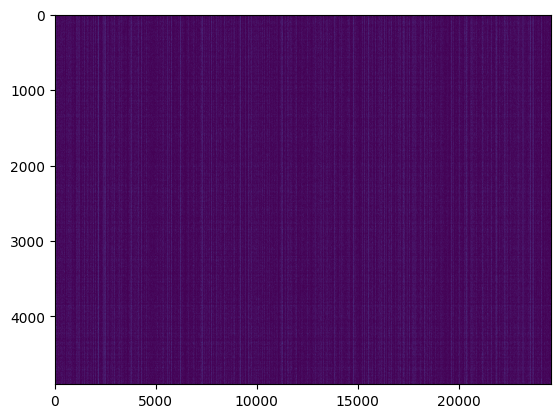

In [6]:
plt.imshow(t > 0, aspect='auto')

In [13]:
q.isnan().any()

tensor(False)

(array([9.220e+02, 2.070e+03, 1.334e+03, 3.970e+02, 1.220e+02, 4.100e+01,
        1.000e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([-0.05925403, -0.02766372,  0.00392659,  0.0355169 ,  0.06710722,
         0.09869752,  0.13028783,  0.16187814,  0.19346845,  0.22505876,
         0.25664908]),
 <BarContainer object of 10 artists>)

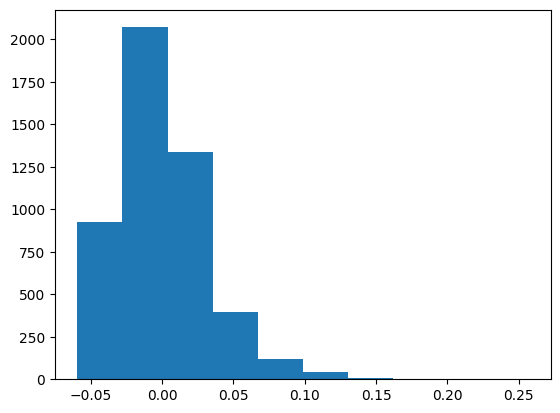

In [19]:
plt.hist(torch.mean((t - mean) / (std + 1e-8), dim=1))

In [14]:
import mteb

/Users/plato/code/mteb/v/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
tasks = mteb.get_tasks(tasks=["Banking77Classification"])
evaluation = mteb.MTEB(tasks=tasks)

In [21]:
evaluation.tasks[0].metadata_dict.get("eval_splits", [])

['test']

In [22]:
data = evaluation.tasks[0].load_data(evaluation_splits=["test"])

In [28]:
evaluation.tasks[0].method

'logReg'

In [30]:
evaluation.tasks[0].samples_per_label

8

In [7]:
import torch

a = torch.ones(16, 64) * 4

b = (torch.rand(16, 32) > 0) * 1.0

b = torch.sum(b, dim=1)

print(a.shape)
print(b.shape)

a / b.unsqueeze(1)



torch.Size([16, 64])
torch.Size([16])


tensor([[0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250],
        ...,
        [0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250,  ..., 0.1250, 0.1250, 0.1250]])

In [8]:
from matplotlib import pyplot as plt
import json

In [31]:
with open('stats2.json') as f:
    stats = json.load(f)

(array([ 1.,  0.,  0.,  0.,  3.,  2.,  5.,  2.,  5.,  3.,  4.,  5., 10.,
         4.,  7.,  5.,  9., 11.,  8., 15., 16., 12., 14.,  8.,  6., 14.,
        17., 12.,  3., 12.,  8., 10., 11.,  8.,  7.,  3.,  2.,  4.,  3.,
         3.,  4.,  3.,  1.,  2.,  2.,  3.,  0.,  1.,  0.,  0.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.15837623, 0.16329754, 0.16821885, 0.17314016, 0.17806148,
        0.18298279, 0.1879041 , 0.19282541, 0.19774672, 0.20266803,
        0.20758934, 0.21251065, 0.21743196, 0.22235327, 0.22727459,
        0.2321959 , 0.23711721, 0.24203852, 0.24695983, 0.25188114,
        0.25680245, 0.26172376, 0.26664507, 0.27156638, 0.2764877 ,
        0.28140901, 0.28633032, 0.29125163, 0.29617294, 0.30109425,
        0.30601556, 0.3109

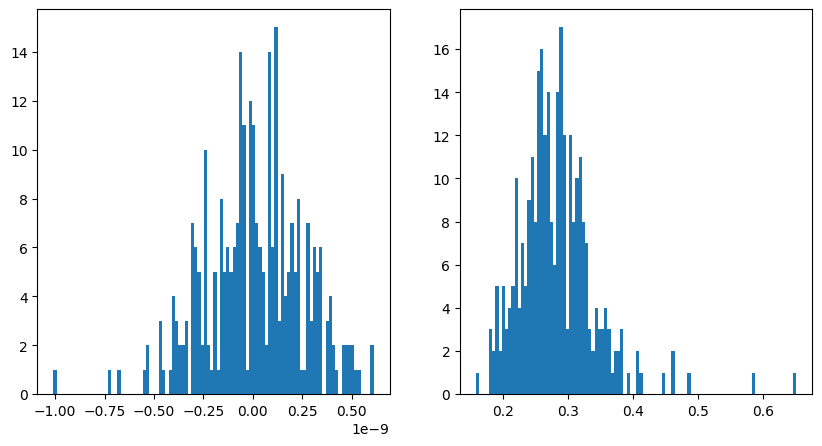

In [32]:
# plot means and stds historgrams next to each other 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = stats['means']
stds = stats['stds']

axs[0].hist(means, bins=100)
axs[1].hist(stds, bins=100)

(array([ 1.,  1.,  0.,  0.,  4.,  3.,  7.,  2.,  6.,  4.,  4.,  7.,  3.,
         8.,  7.,  7.,  3.,  5.,  4.,  1.,  5.,  5.,  8.,  4.,  9., 10.,
         5.,  5.,  5.,  6.,  8.,  8.,  5.,  7., 11.,  7.,  6.,  5.,  5.,
         4.,  5.,  9.,  7.,  3.,  3.,  5.,  3.,  3.,  4.,  5.,  2.,  5.,
         1.,  2.,  2.,  1.,  0.,  2.,  4.,  2.,  2.,  2.,  0.,  2.,  4.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,
         0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.71992999, 0.7452148 , 0.77049961, 0.79578441, 0.82106922,
        0.84635403, 0.87163884, 0.89692364, 0.92220845, 0.94749326,
        0.97277806, 0.99806287, 1.02334768, 1.04863249, 1.07391729,
        1.0992021 , 1.12448691, 1.14977171, 1.17505652, 1.20034133,
        1.22562613, 1.25091094, 1.27619575, 1.30148056, 1.32676536,
        1.35205017, 1.37733498, 1.40261978, 1.42790459, 1.4531894 ,
        1.47847421, 1.5037

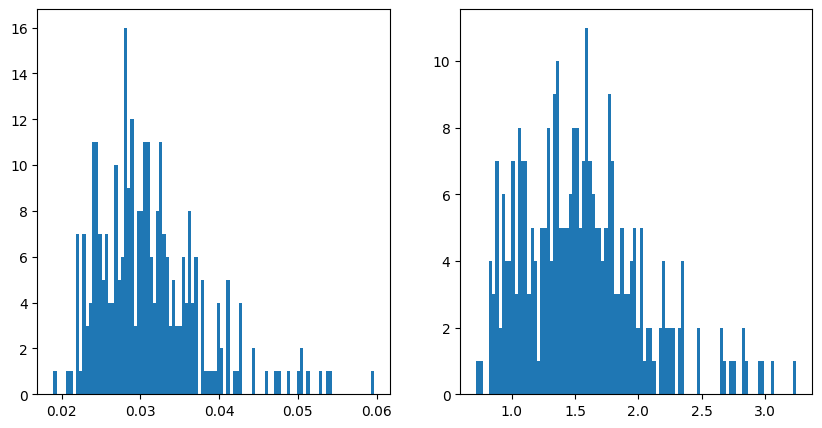

In [13]:
# plot means and stds historgrams next to each other 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = stats['means']
stds = stats['stds']

axs[0].hist(means, bins=100)
axs[1].hist(stds, bins=100)

(array([40., 38., 68., 65., 42., 21., 13.,  4.,  5.,  1.]),
 array([0.20230417, 0.24510125, 0.28789833, 0.3306954 , 0.37349248,
        0.41628956, 0.45908664, 0.50188372, 0.5446808 , 0.58747787,
        0.63027495]),
 <BarContainer object of 10 artists>)

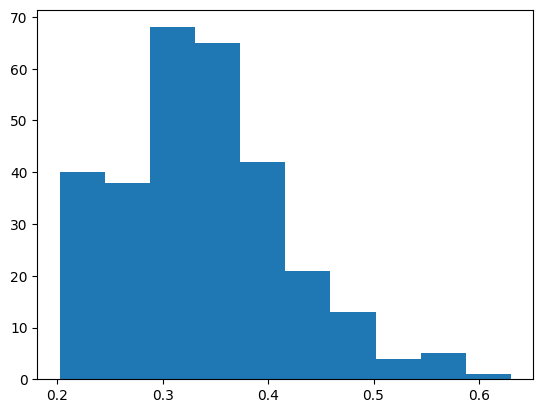

In [10]:
plt.hist(stats['means'])

(array([56., 34., 75., 55., 42., 15.,  8.,  6.,  5.,  1.]),
 array([ 7.53105068,  9.78496637, 12.03888206, 14.29279776, 16.54671345,
        18.80062914, 21.05454483, 23.30846052, 25.56237621, 27.8162919 ,
        30.0702076 ]),
 <BarContainer object of 10 artists>)

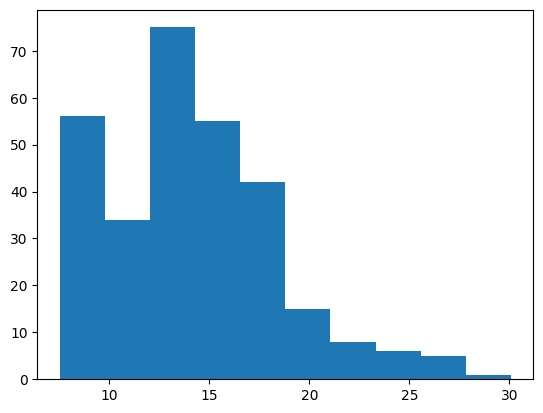

In [11]:
plt.hist(stats['stds'])